In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import json
from sklearn import preprocessing
from sklearn import model_selection
from scikeras.wrappers import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from bayes_opt import BayesianOptimization  
from Data_mining import data_mining

In [2]:
#Data mining process
#df=data_mining("ETH-USDT", "5m", "2021/01/01", "2023/08/11")
#df.to_csv("ETH-USDT_5m.csv")
#df

In [3]:
df=pd.read_csv('./ETH-USDT_5m.csv')
df=df.set_index(['time'])
df

,open,close,high,low,volume
time,,,,,
2021-01-01 00:00:00,738.52,739.09,739.09,737.71,9102.55
2021-01-01 00:05:00,739.09,739.65,740.49,738.83,9580.63
2021-01-01 00:10:00,739.65,739.18,740.11,738.98,8915.66
2021-01-01 00:15:00,739.18,739.07,739.87,738.75,8787.57
2021-01-01 00:20:00,739.10,741.32,741.51,738.94,9586.71
...,...,...,...,...,...
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23
2023-08-10 23:45:00,1850.67,1851.03,1851.54,1850.67,1229.89


In [4]:
pd.date_range(start='2021-01-01 00:00:00', end='2023-08-03 23:55:00').difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

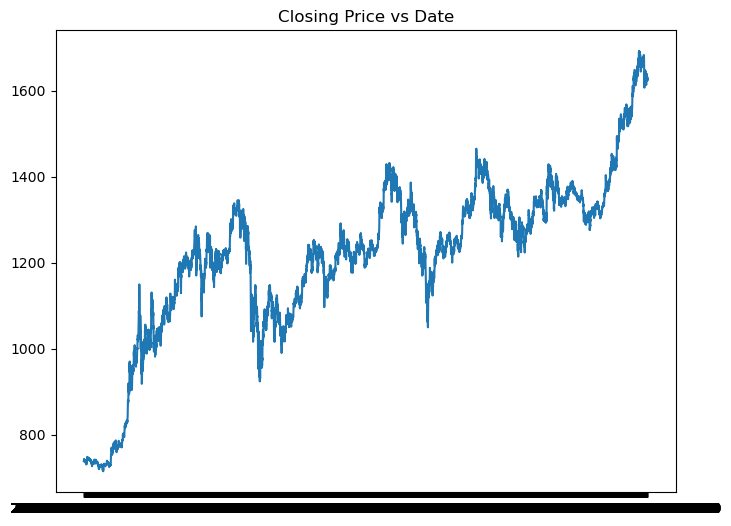

In [5]:
plt.figure(figsize=(8,6))
plt.title("Closing Price vs Date")
plt.plot(df['close'][0:10000])
plt.show()

In [5]:
df['tomorrow']=df['close'].shift(-1)
df['target']=(df['tomorrow'] > df['close']).astype(int)
df

,open,close,high,low,volume,tomorrow,target
time,,,,,,,
2021-01-01 00:00:00,738.52,739.09,739.09,737.71,9102.55,739.65,1
2021-01-01 00:05:00,739.09,739.65,740.49,738.83,9580.63,739.18,0
2021-01-01 00:10:00,739.65,739.18,740.11,738.98,8915.66,739.07,0
2021-01-01 00:15:00,739.18,739.07,739.87,738.75,8787.57,741.32,1
2021-01-01 00:20:00,739.10,741.32,741.51,738.94,9586.71,744.09,1
...,...,...,...,...,...,...,...
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1850.67,1
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1851.03,1
2023-08-10 23:45:00,1850.67,1851.03,1851.54,1850.67,1229.89,1850.37,0


In [6]:
df=df.drop(df.index[-1])
del df['tomorrow']

In [7]:
df

,open,close,high,low,volume,target
time,,,,,,
2021-01-01 00:00:00,738.52,739.09,739.09,737.71,9102.55,1
2021-01-01 00:05:00,739.09,739.65,740.49,738.83,9580.63,0
2021-01-01 00:10:00,739.65,739.18,740.11,738.98,8915.66,0
2021-01-01 00:15:00,739.18,739.07,739.87,738.75,8787.57,1
2021-01-01 00:20:00,739.10,741.32,741.51,738.94,9586.71,1
...,...,...,...,...,...,...
2023-08-10 23:30:00,1849.37,1849.86,1849.86,1849.32,666.97,1
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1


In [8]:
dataset=df.iloc[:, 0:df.shape[1]].values
dataset.shape

(274458, 6)

In [9]:
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset_scaled=scaler.fit_transform(dataset)

In [10]:
dataset_scaled.shape

(274458, 6)

In [11]:
dataset_scaled[:, 5]

array([1., 0., 0., ..., 1., 0., 1.])

In [12]:
training_set, test_and_validation_set=model_selection.train_test_split(dataset_scaled, test_size=0.01, shuffle=False)
training_set.shape

(271713, 6)

In [13]:
test_and_validation_set.shape

(2745, 6)

In [14]:
validation_set, test_set=model_selection.train_test_split(test_and_validation_set, test_size=0.5, shuffle=False)
print(validation_set.shape)
print(test_set.shape)

(1372, 6)
(1373, 6)


In [15]:
X_train=[]
y_train=[]
for i in range(12, len(training_set)):
    X_train.append(training_set[i-12:i, :])
    y_train.append(training_set[i, 5])
X_train, y_train=np.array(X_train), np.array(y_train)

In [16]:
X_train=np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], df.shape[1]))
X_train.shape

(271701, 12, 6)

In [17]:
y_train.shape

(271701,)

In [18]:
X_validation=[]
y_validation=[]
for i in range(12, len(validation_set)):
    X_validation.append(validation_set[i-12:i, :])
    y_validation.append(validation_set[i, 5])
X_validation, y_validation=np.array(X_validation), np.array(y_validation)
X_validation=np.reshape(X_validation, newshape=(X_validation.shape[0], X_validation.shape[1], df.shape[1]))
X_validation.shape

(1360, 12, 6)

In [19]:
y_validation.shape

(1360,)

In [20]:
#def create_lstm_model(neurons, dropout_rate):
    #model=tf.keras.Sequential()
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True, input_shape=(X_validation.shape[1], X_validation.shape[2])))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=False))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #return model

#neurons=[40,50,60]
#dropout_rate=[0.2, 0.3, 0.4, 0.5]
#epochs=[80,100]
#batch_size=[16,24,32]
#param_grid=dict(model__neurons=neurons, model__dropout_rate=dropout_rate, epochs=epochs, batch_size=batch_size)
#tuning_model=KerasClassifier(model=create_lstm_model, loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], verbose=0)
#grid=model_selection.GridSearchCV(estimator=tuning_model, param_grid=param_grid, n_jobs=None, cv=3, verbose=0)
#grid_result=grid.fit(X_validation, y_validation)

In [21]:
#grid_result.best_params_

In [22]:
#grid_result.best_score_

In [23]:
#grid_results_lstm_classification=grid_result.best_params_
#grid_results_lstm_classification['best_score']=grid_result.best_score_

In [24]:
#grid_results_lstm_classification

In [25]:
#with open('./LSTM Model/LSTM Classification/GridSearch_Results_LSTM_Classification.txt', 'w') as text_file:
    #text_file.write(json.dumps(grid_results_lstm_classification))

In [26]:
with open('./LSTM Model/LSTM Classification/GridSearch_Results_LSTM_Classification.txt') as text_file:
    grid_result=text_file.read()

grid_results_lstm_classification=json.loads(grid_result)
grid_results_lstm_classification

{'batch_size': 16,
 'epochs': 80,
 'model__dropout_rate': 0.2,
 'model__neurons': 60,
 'best_score': 0.5198529626280013}

In [27]:
#def create_lstm_model_bayesian(units, dropout_rate):
    #model=tf.keras.Sequential()
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=True, input_shape=(X_validation.shape[1], X_validation.shape[2])))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=int(units), return_sequences=False))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #return model

#pbounds={'units':(60, 260), 'dropout_rate':(0.2, 0.6)}
#model=KerasClassifier(build_fn=create_lstm_model_bayesian, epochs=100, batch_size=32)
#def optimize_lstm(units, dropout_rate):  
    #model.set_params(units=int(units), dropout_rate=float(dropout_rate))  
    #return -np.mean(sklearn.model_selection.cross_val_score(model, X_validation, y_validation, cv=3, n_jobs=None, scoring='accuracy')) 
#optimizer = BayesianOptimization(f=optimize_lstm, pbounds=pbounds, random_state=42)  
#optimizer.maximize(n_iter=30)

In [28]:
#optimizer.max['params']

In [29]:
#with open('./LSTM Model/LSTM Classification/BayesianSearch_Results_LSTM_Classification.txt', 'w') as text_file_bayes:
    #text_file_bayes.write(json.dumps(optimizer.max['params']))

In [30]:
with open('./LSTM Model/LSTM Classification/BayesianSearch_Results_LSTM_Classification.txt') as text_file:
    bayes_result=text_file.read()

bayes_results_lstm_classification=json.loads(bayes_result)
bayes_results_lstm_classification

{'dropout_rate': 0.3451568488974194, 'units': 73.1427833328722}

In [37]:
lstm_model=tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=False))
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [38]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 12, 128)           69120     
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 lstm_6 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 12, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [39]:
test_inputs=test_and_validation_set[len(test_and_validation_set)-len(test_set):]

In [40]:
X_test=[]
y_test=[]
for i in range(12, len(test_inputs)):
    X_test.append(test_inputs[i-12:i, :])
    y_test.append(test_inputs[i, 5])
X_test, y_test=np.array(X_test), np.array(y_test)
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], df.shape[1]))
X_test.shape

(1361, 12, 6)

In [41]:
training_history=lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/30
8491/8491 [==============================] - 93s 11ms/step - loss: 0.6928 - accuracy: 0.5121 - val_loss: 0.6959 - val_accuracy: 0.5110
Epoch 2/30
8491/8491 [==============================] - 92s 11ms/step - loss: 0.6923 - accuracy: 0.5182 - val_loss: 0.6932 - val_accuracy: 0.5074
Epoch 3/30
8491/8491 [==============================] - 92s 11ms/step - loss: 0.6922 - accuracy: 0.5173 - val_loss: 0.6942 - val_accuracy: 0.5037
Epoch 4/30
8491/8491 [==============================] - 93s 11ms/step - loss: 0.6921 - accuracy: 0.5187 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 5/30
8491/8491 [==============================] - 92s 11ms/step - loss: 0.6921 - accuracy: 0.5195 - val_loss: 0.6955 - val_accuracy: 0.5074
Epoch 6/30
8491/8491 [==============================] - 92s 11ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6946 - val_accuracy: 0.5110
Epoch 7/30
8491/8491 [==============================] - 92s 11ms/step - loss: 0.6921 - accuracy: 0.5188 - val_loss: 0.6950 -

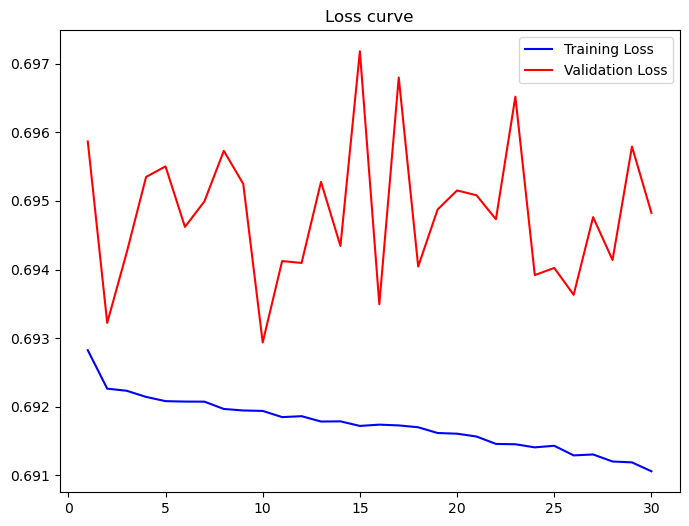

In [43]:
plt.figure(figsize=(8,6))
plt.title('Loss curve')
plt.plot(range(1,31), training_history.history['loss'], color='blue', label='Training Loss')
plt.plot(range(1,31), training_history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()
plt.show()

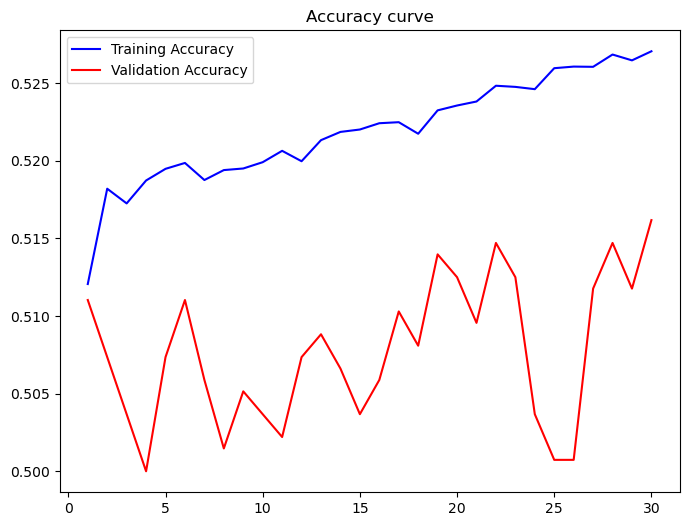

In [44]:
plt.figure(figsize=(8,6))
plt.title('Accuracy curve')
plt.plot(range(1,31), training_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(range(1,31), training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()
plt.show()

In [45]:
training_loss_values_lstm_classification=lstm_model.history.history['loss']
training_accuracy_values_lstm_classification=lstm_model.history.history['accuracy']

In [46]:
lstm_model.save('./LSTM Model/LSTM Classification/LSTM_Classification_model.h5')
lstm_model.save_weights('./LSTM Model/LSTM Classification/LSTM Classification_model_weights')
np.savetxt('./LSTM Model/LSTM Classification/TrainingLossValues.txt', training_loss_values_lstm_classification)
np.savetxt('./LSTM Model/LSTM Classification/TrainingAccuracyValues.txt', training_accuracy_values_lstm_classification)

In [24]:
#training_loss_values_lstm=lstm_model.history.history['loss']

In [27]:
#predicted_close_prices=lstm_model.predict(X_test)

In [28]:
#score=lstm_model.evaluate(X_test, y_test)

In [29]:
#lstm_model.save('./LSTM Model/LSTM_model.h5')
#lstm_model.save_weights('./LSTM Model/LSTM_model_weights')
#np.savetxt('./LSTM Model/TrainingLossValues.txt', training_loss_values_lstm)

In [30]:
training_loss_values_lstm=np.loadtxt('./LSTM Model/TrainingLossValues.txt')
lstm_model=tf.keras.models.load_model('./LSTM Model/LSTM_model.h5')

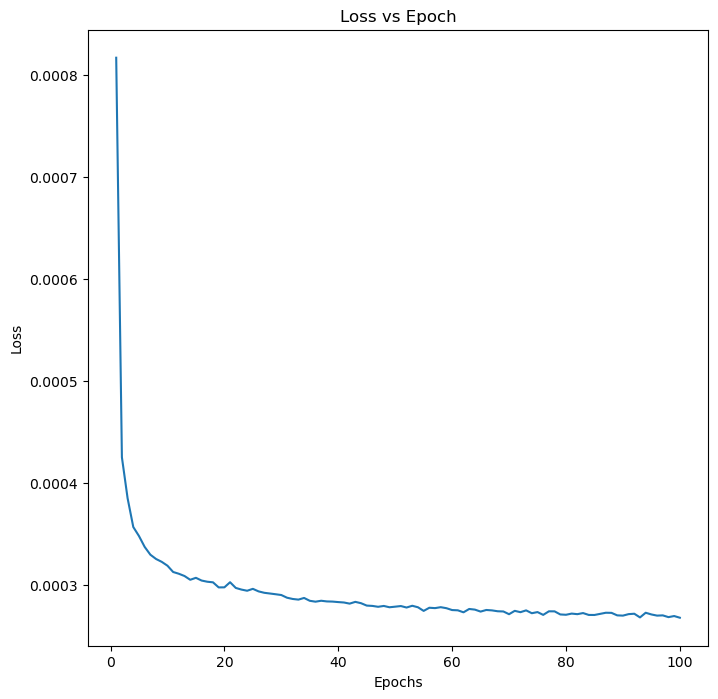

In [31]:
plt.figure(figsize=(8,8))
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(1, 101), training_loss_values_lstm)
plt.show()

In [32]:
test_inputs=test_and_validation_set[len(test_and_validation_set)-len(test_set):]
test_inputs.shape

(2745, 5)

In [33]:
X_test=[]
y_test=[]
for i in range(12, len(test_inputs)):
    X_test.append(test_inputs[i-12:i, :])
    y_test.append(test_inputs[i, 1])
    
X_test, y_test=np.array(X_test), np.array(y_test)
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], X_test.shape[2]))
y_test.shape

(2733,)

In [34]:
score=lstm_model.evaluate(X_test, y_test)

86/86 [==============================] - 6s 13ms/step - loss: 1.3950e-06


In [35]:
predicted_close_prices=lstm_model.predict(X_test)

86/86 [==============================] - 3s 11ms/step


In [36]:
predicted_close_prices.shape

(2733, 1)

In [37]:
prediction_copies_array = np.repeat(predicted_close_prices,5, axis=-1)
predicted_close_prices = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predicted_close_prices),5)))[:,0]

In [38]:
y_test_copy = np.repeat(y_test,5, axis=-1)
y_test = scaler.inverse_transform(np.reshape(y_test_copy,(len(y_test),5)))[:,0]

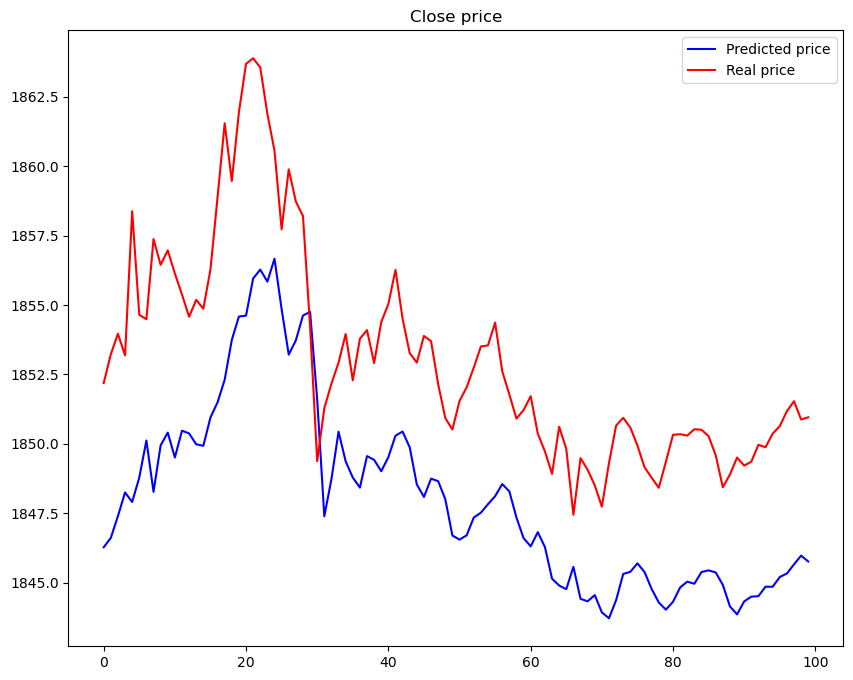

In [39]:
plt.figure(figsize=(10,8))
plt.plot(predicted_close_prices[len(predicted_close_prices)-100:len(predicted_close_prices)], color='blue', label='Predicted price')
plt.plot(y_test[len(y_test)-100:len(y_test)], color='red', label='Real price')
plt.title("Close price")
plt.legend()
plt.show()

### Building Random Forest Model

In [42]:
dataset_rf=df.copy()

In [48]:
dataset_rf['tomorrow']=dataset_rf['close'].shift(-1)

In [55]:
dataset_rf['target']=(dataset_rf['tomorrow'] > dataset_rf['close']).astype(int)

In [57]:
dataset_rf

,open,close,high,low,volume,tomorrow,target
time,,,,,,,
2021-01-01 00:00:00,738.52,739.09,739.09,737.71,9102.55,739.65,1
2021-01-01 00:05:00,739.09,739.65,740.49,738.83,9580.63,739.18,0
2021-01-01 00:10:00,739.65,739.18,740.11,738.98,8915.66,739.07,0
2021-01-01 00:15:00,739.18,739.07,739.87,738.75,8787.57,741.32,1
2021-01-01 00:20:00,739.10,741.32,741.51,738.94,9586.71,744.09,1
...,...,...,...,...,...,...,...
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1850.67,1
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1851.03,1
2023-08-10 23:45:00,1850.67,1851.03,1851.54,1850.67,1229.89,1850.37,0


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [60]:
randomForest_model=RandomForestClassifier(n_estimators=150, min_samples_split=100, random_state=1)

In [62]:
trainset_rf=dataset_rf.iloc[:-100]
testset_rf=dataset_rf.iloc[-100:]
predictors=['close', 'open', 'low', 'high', 'volume']

In [63]:
randomForest_model.fit(trainset_rf[predictors], trainset_rf['target'])

RandomForestClassifier(min_samples_split=100, n_estimators=150, random_state=1)

In [67]:
predictions=randomForest_model.predict(testset_rf[predictors])
predictions=pd.Series(predictions, index=testset_rf.index)

In [68]:
precision_score(testset_rf['target'], predictions)

0.49230769230769234

In [70]:
results_rf=pd.concat([testset_rf['target'], predictions], axis=1)

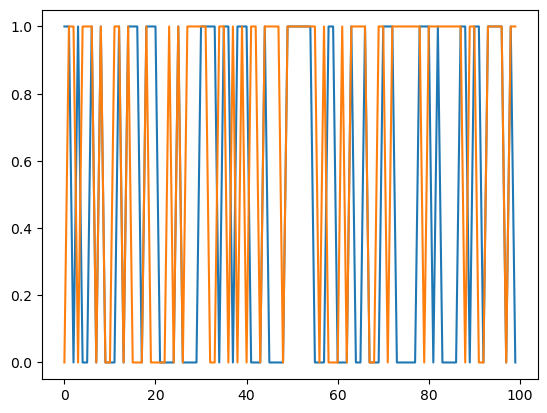

In [74]:
plt.plot(range(0,100) ,results_rf)
plt.show()